# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [5]:
# so as you can see that after this we are going to apply feature scaling for that we need our
# input values should be in 2D array so by now our X is in 2D array but y is not to convert our y
# into 2D array we are using this line of code which we have already used in mutliple linear regression
# model
y = y.reshape(len(y),1)
#    |with the reshape and ,1 we can convert a 1D row to the 2D column  array so that we can use it in feature scaling

In [6]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = X[:,:] = sc_X.fit_transform(X[:,:])
y = y[:,:] = sc_y.fit_transform(y[:,:])

In [8]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [9]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [19]:
'''
so here bascially we are using a kernal = 'rbf' where rbf stands for Radial Basis Function.
In Support Vector Regression (SVR), the kernel attribute specifies the type of kernel function
to be used in the algorithm. Kernels are crucial because they transform the input data into a
'higher-dimensional' space where it becomes easier to perform the regression. Here’s why we use kernels
pg - 70 in ML-A-Z-Course
The rbf kernel is used, which is the default and is typically a good starting point because of its
flexibility in handling 'non-linear relationships.'
'''
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [ ]:
#  we have used this cell for predicting  the single value

In [20]:
# so in this cell we are predeicting the result because of that we are using the
# predict keyword but we dont need to direct predict the dataset because there X and y
# values are far appart because of that we have used feature scaling which is sc_X and sc_y
# through that we are predicting the values

# Note : if we are not using feature sacling in our code so we can use this simple predict method
# that means our dataset values are not that far appart like 10 and 10000 there will be more like 10-90-70-120-200
regressor.predict(sc_X.transform([[6.5]]))

# so by this we get the output of -0.27861589 which is in the from of frature scaling
# we have done only feature scaling only so that X and y values does not far appart
# but in our predection we do not need such frature scaling  value so we are going to reverse that scaling by
# inverse_transform() mathod which is sc_y.inverse_transform() so this is the method we are going to use under
#  that parathesis we are going to put regressor.predict(sc_X.transform([[6.5]])) this so and in order to avoid
# the error such as 1D and 2D we are  giving it .reshape(-1,1)

sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

## Visualising the SVR results

In [ ]:
# At first line we have done inverse_transform to remove the feature sacling from sc_x and sc_y
# in the second line at first we have done inverse_transform then we want to predict the whole svr result
# to do that we are taking [Predicting a new result] 👆🏻 code which we used for predicting the single value
# sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))
# we are replacing that single value sc_X.transform([[6.5]]) with X
# so (regressor.predict(X).reshape(-1,1))

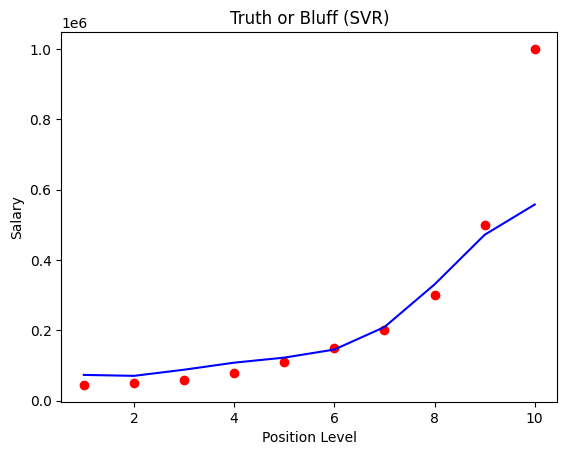

In [22]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)),color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

<ipython-input-27-b8c0beb623f3>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)


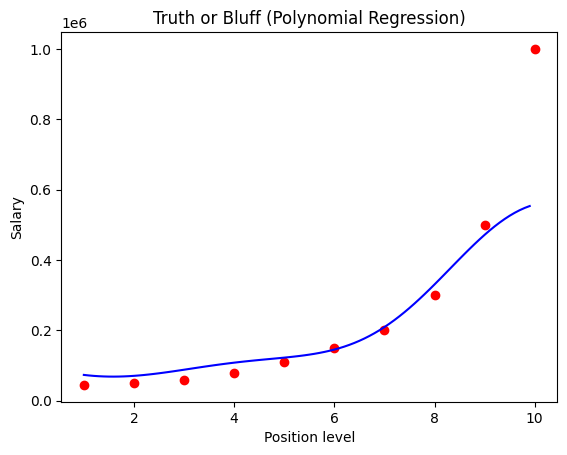

In [27]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()